# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ndibene dahra
Processing Record 2 of Set 1 | whyalla stuart
City not found. Skipping...
Processing Record 3 of Set 1 | valparaiso
Processing Record 4 of Set 1 | corner brook
Processing Record 5 of Set 1 | constitucion
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | weno
Processing Record 10 of Set 1 | plymouth
Processing Record 11 of Set 1 | bandarbeyla
Processing Record 12 of Set 1 | charlottetown
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | sale
Processing Record 15 of Set 1 | belyy yar
Processing Record 16 of Set 1 | teknaf
Processing Record 17 of Set 1 | byron bay
Processing Record 18 of Set 1 | udachny
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | afaahiti
Processing Record 21 of Set 1 | harper
Processing Record 22 of S

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ndibene dahra,15.3338,-15.4766,21.81,10,0,4.79,SN,1738792499
1,valparaiso,-33.0393,-71.6273,28.13,37,0,10.80,CL,1738792502
2,corner brook,48.9667,-57.9484,-13.20,90,100,5.16,CA,1738792503
3,constitucion,-35.3333,-72.4167,20.55,54,11,7.17,CL,1738792504
4,lebu,-37.6167,-73.6500,18.46,81,1,4.78,CL,1738792505


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ndibene dahra,15.3338,-15.4766,21.81,10,0,4.79,SN,1738792499
1,valparaiso,-33.0393,-71.6273,28.13,37,0,10.80,CL,1738792502
2,corner brook,48.9667,-57.9484,-13.20,90,100,5.16,CA,1738792503
3,constitucion,-35.3333,-72.4167,20.55,54,11,7.17,CL,1738792504
4,lebu,-37.6167,-73.6500,18.46,81,1,4.78,CL,1738792505


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

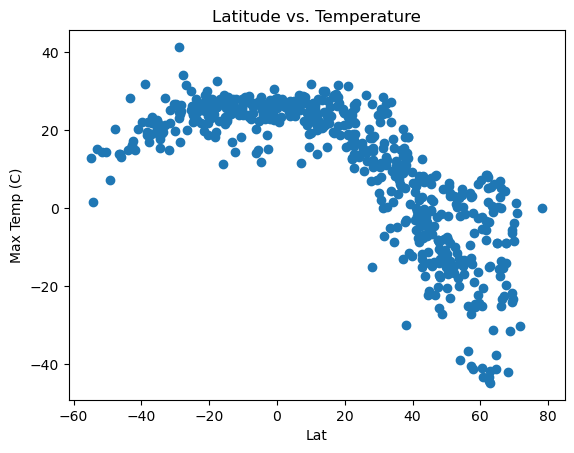

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Lat")
plt.ylabel("Max Temp (C)")
plt.title("Latitude vs. Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

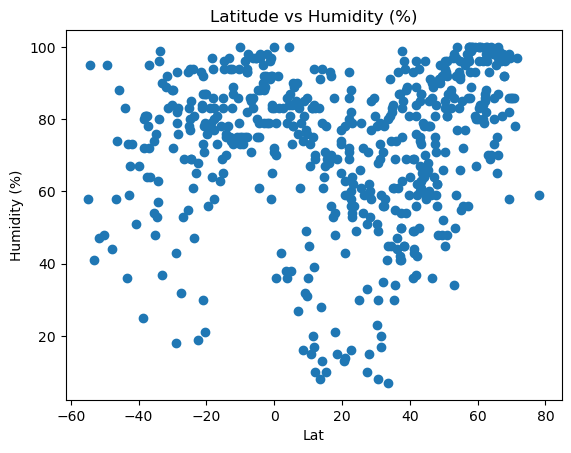

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Lat")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

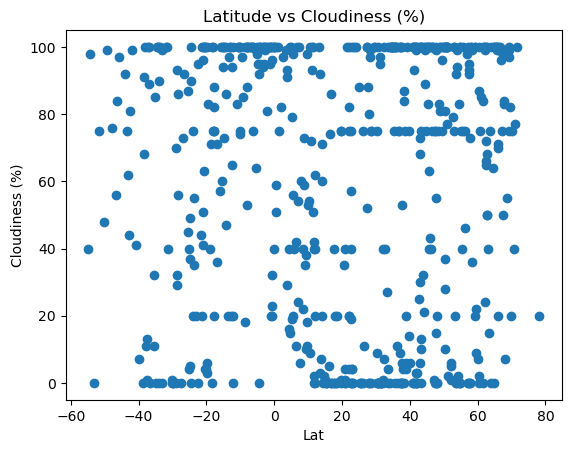

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Lat")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

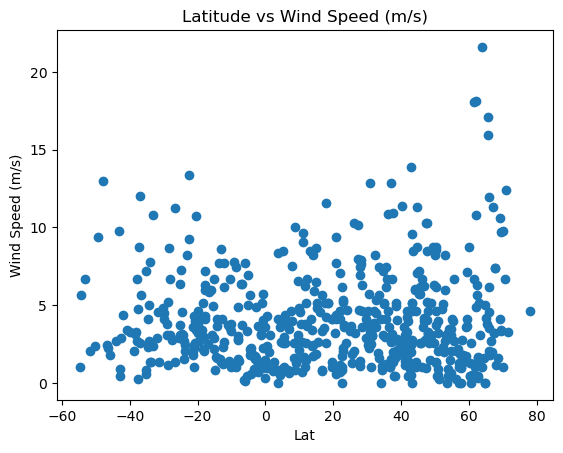

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Lat")
plt.ylabel("Wind Speed (m/s)")
plt.title("Latitude vs Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x,y):
    corr = stats.pearsonr(x,y)
    slope,int,r,p,stdr = stats.linregress(x,y)
    fit = slope*x+int
    equation = f"y={slope:0.2f}x+{int:0.2f}"

    plt.scatter(x,y)
    plt.plot(x,fit,color="r")

    print(f"The r-value between {x.name} and {y.name} is {corr[0]}")

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ndibene dahra,15.3338,-15.4766,21.81,10,0,4.79,SN,1738792499
2,corner brook,48.9667,-57.9484,-13.20,90,100,5.16,CA,1738792503
7,weno,7.4515,151.8468,27.97,83,100,4.63,FM,1738792509
8,plymouth,41.8334,-70.8328,-1.08,37,0,4.63,US,1738792510
9,bandarbeyla,9.4942,50.8122,22.66,77,38,6.55,SO,1738792511


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,valparaiso,-33.0393,-71.6273,28.13,37,0,10.80,CL,1738792502
3,constitucion,-35.3333,-72.4167,20.55,54,11,7.17,CL,1738792504
4,lebu,-37.6167,-73.6500,18.46,81,1,4.78,CL,1738792505
5,grytviken,-54.2811,-36.5092,1.62,95,98,5.64,GS,1738792440
6,blackmans bay,-43.0167,147.3167,15.41,73,62,0.45,AU,1738792507


###  Temperature vs. Latitude Linear Regression Plot

The r-value between Lat and Max Temp is -0.803682489127518


Text(0, 0.5, 'Temperature (C)')

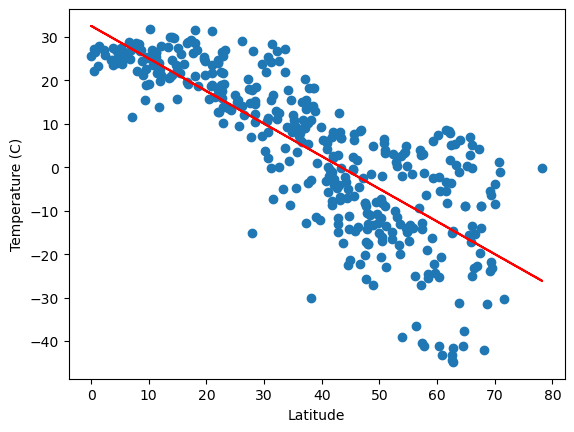

In [54]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")

The r-value between Lat and Max Temp is 0.4504004250154077


Text(0, 0.5, 'Temperature (C)')

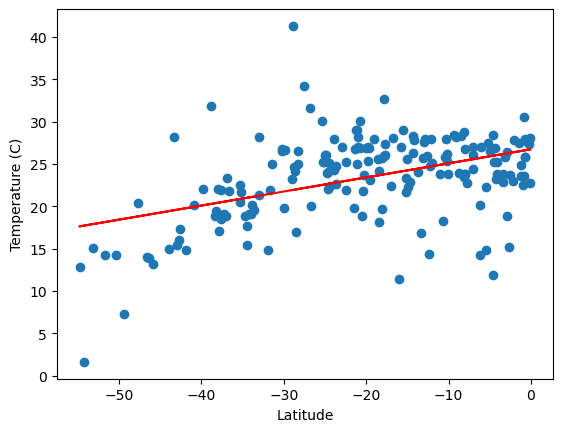

In [56]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")

**Discussion about the linear relationship:**
The correlation between latitude and temperature in the northern hemisphere is -0.803682489127518, showing us that as latitude increases, temperature generally decreases in cities in the northern hemisphere. A negative correlation so close to -1 indicates that there is a very strong negative correlation between latitude and temperature in the northern hemisphere.

The correlation between latitude and temperature in the southern hemisphere is 0.4504004250154077, showing us that as latitude increases, tempereature generally also increases in cities in the southern hemisphere. A correlation of 0.45 would indicate there is a moderate positive correlation between latitude and temperature in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value between Lat and Humidity is 0.39723875050449087


Text(0, 0.5, 'Humidity (%)')

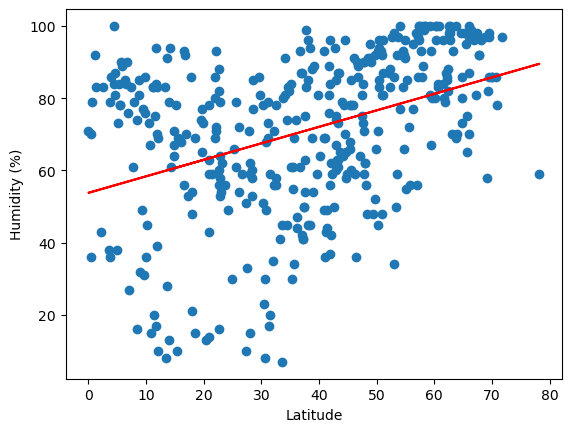

In [57]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

The r-value between Lat and Humidity is 0.39831374991784807


Text(0, 0.5, 'Humidity (%)')

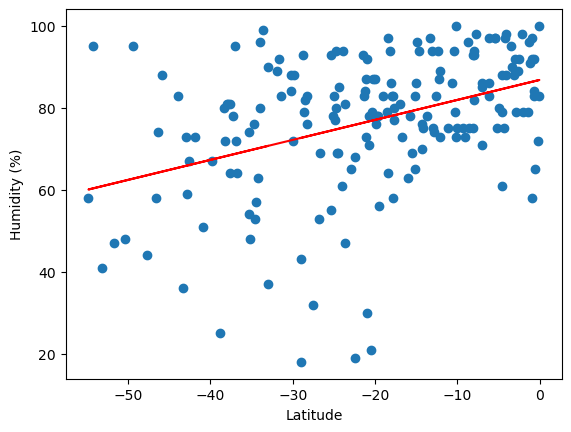

In [58]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

**Discussion about the linear relationship:**
Both the southern and northern hemisphere have a correlation around 0.39, indicating that as latitude increases, the humidity percentage in both hemispheres will also increase. A correlation of 0.39 is generally accepted to be a weak correlation, so it can be siad that there is a weak positive correlation between latitude and humidity percentage in both the southern and northern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value between Lat and Cloudiness is 0.1935983981316084


Text(0, 0.5, 'Cloudiness (%)')

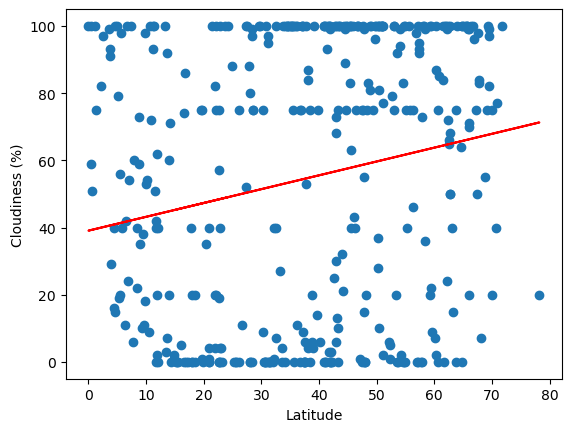

In [59]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

The r-value between Lat and Cloudiness is 0.27280878260731745


Text(0, 0.5, 'Cloudiness (%)')

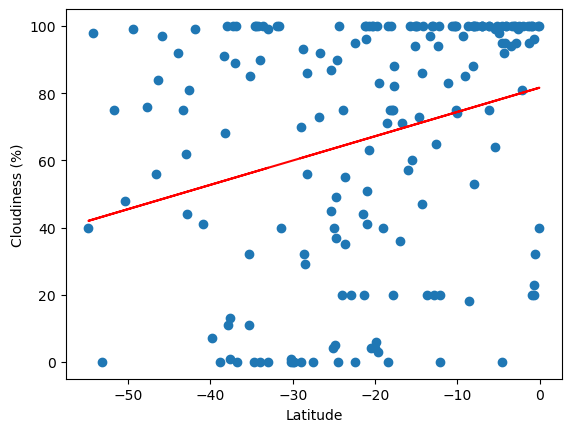

In [60]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

**Discussion about the linear relationship:**

A correlation of 0.1935983981316084, indicates a very weak positive correlation between latitude and cloudiness in the northern hemisphere, meaning that as latitude increases, so will cloudiness, however there won't be that much of an impact.

A correlation of 0.27280878260731745, indicates a weak positive correlation between latitude and cloudiness in the southern hemisphere, meaning that as latidude increases, so will cloudiness, the effect will be rather weak, but still more noticeable than in the northern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value between Lat and Wind Speed is 0.07782951176911326


Text(0, 0.5, 'Wind Speed (m/s)')

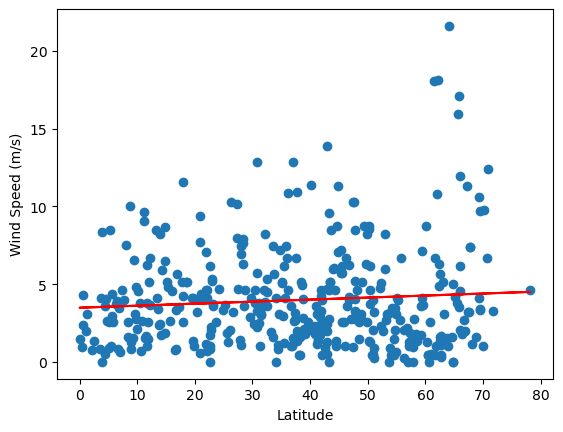

In [61]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

The r-value between Lat and Wind Speed is -0.18746084566255822


Text(0, 0.5, 'Wind Speed (m/s)')

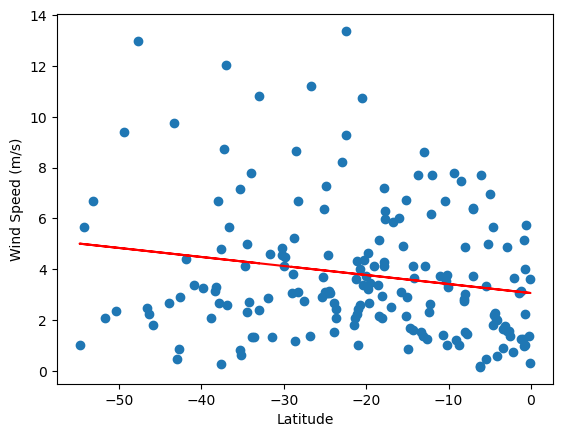

In [62]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

**Discussion about the linear relationship:**
A correlation of 0.07782951176911326 in the northern hemisphere indicates an almost non-existent positive relationship between latitude and wind speed, however the impact is very minimal.

A correlation of -0.18746084566255822 in the southern hemisphere indicates that there is a very weak negative correlation betwen latitude and wind speed in the south, meaning the higher you go, the slower the wind will be, but only slightly.